# 28 - Text Visualization

In [3]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk

In [19]:
text = open("Mission_Impossible_6_Review.txt", "r").read()

### Remove Punctuation and Special Characters

In [5]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

In [6]:
print("My Previous Text")
print("----------------")
print(text)
print("----------------")
print("My New Text")
print("----------------")
print(my_new_text)

My Previous Text
----------------
Before its release, Mission: Impossible Fallout has been known for two things: the fact that it's the first direct sequel in the series and THAT injury to Tom Cruise.Let's get the injury out of the way first. The shot is in the movie and it will make you wince because you know the context, but otherwise you don't really notice any difference as the stunt in question is just the latest in a long line of deathdefying activities featuring Cruise.What makes more of an impact on the sixth movie in the series is its connection to the previous movie, Rogue Nation, with the return of the villainous Solomon Lane (played creepily again by Sean Harris) and his nefarious Syndicate, who are again threatening the world.With the addition of Ethan Hunt's former wife Julia (Michelle Monaghan) from the third movie, Fallout is immediately given more depth than previous outings and the stakes feel higher, with Ethan Hunt (Cruise) haunted by his past mistakes. However, a d

In [7]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 

#stopword removal
filtered_sentence = [w for w in word_tokens if not w in stop_words]

#lemmatization
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2c. Create n grams where n is the number of words

In [21]:
# n gram jadi bagian dari text visualization

from nltk import ngrams
n = 3 # trigram
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [22]:
print(total_grams[:10])

[('Before', 'release', 'Mission'), ('release', 'Mission', 'Impossible'), ('Mission', 'Impossible', 'Fallout'), ('Impossible', 'Fallout', 'known'), ('Fallout', 'known', 'two'), ('known', 'two', 'thing'), ('two', 'thing', 'fact'), ('thing', 'fact', 'first'), ('fact', 'first', 'direct'), ('first', 'direct', 'sequel')]


### 2d. Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

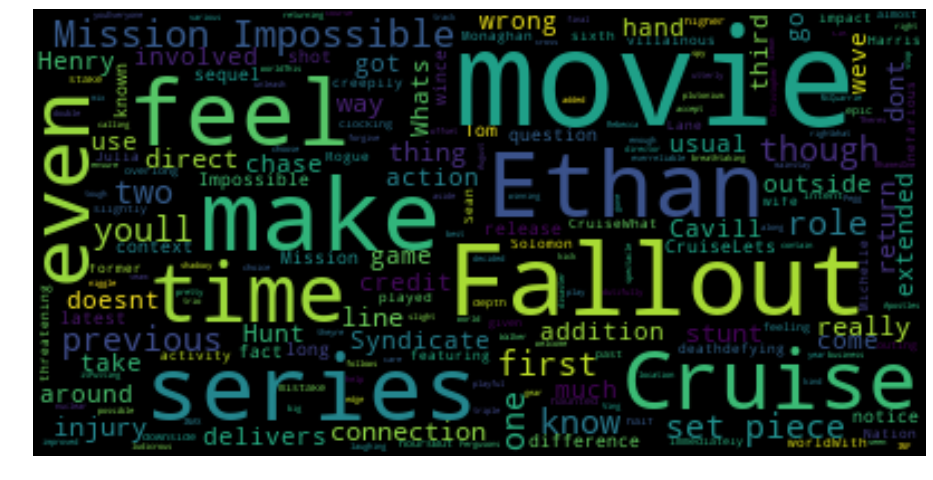

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60).generate(normalized)
# Kata-kata yang tidak memberi pengetahuan tambahan atau kurang menggambarkan text nggak usah di-include
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

Mission was found 4 times
Impossible was found 4 times
Fallout was found 6 times
series was found 5 times
get was found 4 times
movie was found 12 times
make was found 6 times
Ethan was found 4 times
feel was found 5 times
Cruise was found 4 times
time was found 4 times
even was found 4 times


<Text: The Man Who Was Thursday by G . K . Chesterton 1908>


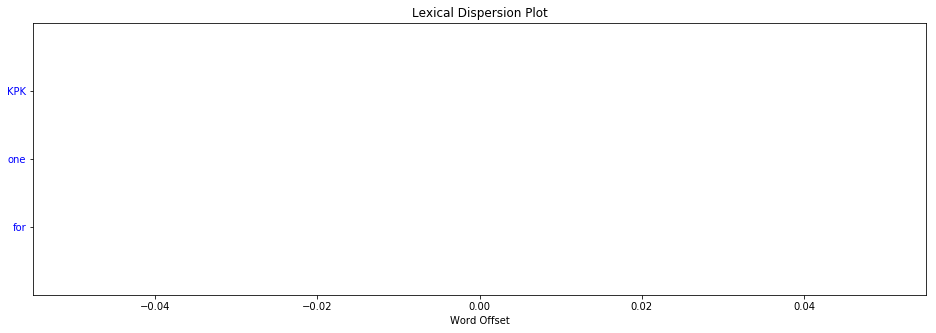

In [20]:
from nltk.book import text9 as content
print(content)
plt.figure(figsize=(16,5))
topics = ['KPK','one','for']
nltk.Text("""One of the candidates for leadership of the Corruption Eradication Commission (KPK), Insp. Gen. Dharma Pongrekun, is criticizing the vitriolic attitude toward candidates who have yet to submit their wealth reports to the commission. 

The wealth report (LHKPN) is one of the requirements to be fulfilled by the candidates as stipulated in the 1999 Good Governance and Freedom from Corruption, Collusion and Nepotism Law as well as in the 2002 KPK Law. 

However, some of the candidates for KPK leadership passed the selection without submitting their wealth reports, arousing criticism from other institutions.

To Dharma, the polemic revolving around the wealth report submission only reveals dislike for candidates who have passed the selection.

“If they criticize this out of dislike, then what is there to discuss? I don’t think this attitude is aligned with Pancasila,” Dharma said on Thursday, referring to the nation’s ideology. He added that this matter should not be an issue in the first place, because adopting Pancasila values meant people should accept differences.

Dharma, however, did not specify what kind of differences he was talking about. He went on to say that he did not see anything wrong with candidates who had yet to submit their wealth reports.

“The wealth report is not relevant with the God’s law. Why? Because the concept is atheistic in its nature,” he said as quoted by kompas.com on Thursday. """).dispersion_plot(topics)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


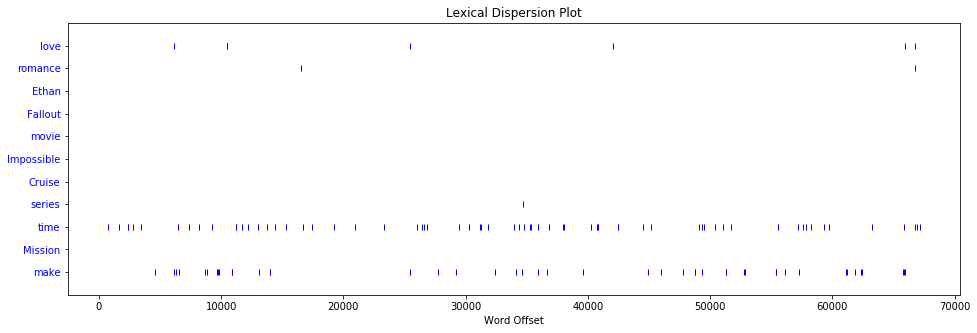

In [13]:
from nltk.book import text9 as content
plt.figure(figsize=(16,5))
topics = ['love','romance','Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

# Topic Modelling

In [23]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Kumpulkan keywords untuk menemukan topik.
# Document clustering untuk pengkategorian dokumen berdasarkan topik.
# Topik untuk membantu information retrieval; bisa memproduce query untuk dokumen yang tepat.
# Feature berupa keywords.
# Topic detection juga bisa dideteksi dengan topic modelling.

### 3a. Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with <b>Latent Dirichlet Allocation (LDA)</b> technique.

Why <b>Latent Dirichlet Allocation</b>? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

- Training documents may come in sequentially, no random access required.
- Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.
- Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [26]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence)) # Siapkan datanya!

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]
# print(doc_term_matrix) # Vocabulary di-vektor (atau di-matriks?). Menandai muncul sesuai indeks atau tidak.

### 3b. Creating the object for LDA model & train the model

In [32]:
Lda = gensim.models.ldamodel.LdaModel # Membangun model/cetakan, nanti luarannya sesuai.

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=100)
# Seperti K-means clustering, num_topics kita tentukan sendiri, kudu bereksperimen.

### 3c. Extract two topics with twenty words in each topic

In [33]:
print(ldamodel.print_topics(num_topics=3, num_words=15))

# Setelah terbentuk cluster, kita harus melabeli cluster-cluster tersebut.
# Angka-angka menunjukkan bobot/relevansi subtopik untuk menjelaskan topiknya.

[(0, '0.024*"fallout" + 0.020*"mission" + 0.020*"series" + 0.017*"ethan" + 0.017*"theres" + 0.013*"two" + 0.013*"previous" + 0.013*"set" + 0.013*"role" + 0.009*"use" + 0.009*"stunt" + 0.009*"whats" + 0.009*"come" + 0.009*"connection" + 0.009*"its"'), (1, '0.017*"get" + 0.017*"even" + 0.013*"one" + 0.013*"though" + 0.013*"first" + 0.009*"make" + 0.009*"got" + 0.009*"injury" + 0.009*"line" + 0.009*"around" + 0.009*"the" + 0.009*"knows" + 0.009*"weve" + 0.009*"addition" + 0.009*"extended"'), (2, '0.035*"movie" + 0.020*"impossible" + 0.016*"cruise" + 0.016*"feel" + 0.016*"makes" + 0.013*"like" + 0.013*"movies" + 0.013*"youll" + 0.009*"third" + 0.009*"doesnt" + 0.009*"action" + 0.009*"way" + 0.009*"much" + 0.009*"wrong" + 0.009*"time"')]


### 3d. Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [34]:
'''Compute Perplexity'''

# Perplexity: keadaan ketika kebingungan.
# Memisahkan antara satu topik dengan topik lain berdasarkan kata-kata di atas.
# Semakin kecil nilai perplexity, semakin bagus.
# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

# Semakin tinggi nilai coherence, semakin bagus.
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.98605171985511

Coherence Score:  0.8558284570022806


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [35]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis
print(vis)

# Kelompok 0 dengan 1 letaknya berjauhan. Ini bagus, karena kelihatan berbeda.
# Semakin jauh clusternya, semakin kelihatan topiknya beda.

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.105906 -0.062633       1        1  33.966080
0     -0.110473 -0.055174       2        1  33.525215
1      0.004566  0.117807       3        1  32.508705, topic_info=    Category      Freq          Term     Total  loglift  logprob
21   Default  5.000000         movie  5.000000  30.0000  30.0000
4    Default  3.000000       fallout  3.000000  29.0000  29.0000
12   Default  3.000000        series  3.000000  28.0000  28.0000
2    Default  3.000000       mission  3.000000  27.0000  27.0000
3    Default  3.000000    impossible  3.000000  26.0000  26.0000
17   Default  2.000000           get  2.000000  25.0000  25.0000
108  Default  2.000000          even  2.000000  24.0000  24.0000
60   Default  2.000000         ethan  2.000000  23.0000  23.0000
158  Default  2.000000        theres  2.000000  22.0000  22.0000
73   Default  2.000000          feel 

In [36]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.105906 -0.062633       1        1  33.966080
0     -0.110473 -0.055174       2        1  33.525215
1      0.004566  0.117807       3        1  32.508705, topic_info=    Category      Freq          Term     Total  loglift  logprob
21   Default  5.000000         movie  5.000000  30.0000  30.0000
4    Default  3.000000       fallout  3.000000  29.0000  29.0000
12   Default  3.000000        series  3.000000  28.0000  28.0000
2    Default  3.000000       mission  3.000000  27.0000  27.0000
3    Default  3.000000    impossible  3.000000  26.0000  26.0000
17   Default  2.000000           get  2.000000  25.0000  25.0000
108  Default  2.000000          even  2.000000  24.0000  24.0000
60   Default  2.000000         ethan  2.000000  23.0000  23.0000
158  Default  2.000000        theres  2.000000  22.0000  22.0000
73   Default  2.000000          feel  2.000000  21.0000  21.0000
76   Default  2.000000        cruise  2.000000  20.0000  20.0000
40   Default  2.000000         makes  2.000000  19.0000  19.0000
157  Default  2.000000           one  2.000000  18.0000  18.0000
9    Default  2.000000         first  2.000000  17.0000  17.0000
142  Default  2.000000        though  2.000000  16.0000  16.0000
6    Default  2.000000           two  2.000000  15.0000  15.0000
174  Default  2.000000           set  2.000000  14.0000  14.0000
197  Default  2.000000          role  2.000000  13.0000  13.0000
44   Default  2.000000      previous  2.000000  12.0000  12.0000
96   Default  2.000000         youll  2.000000  11.0000  11.0000
256  Default  2.000000          like  2.000000  10.0000  10.0000
213  Default  2.000000        movies  2.000000   9.0000   9.0000
129  Default  1.000000           got  1.000000   8.0000   8.0000
186  Default  1.000000         knows  1.000000   7.0000   7.0000
59   Default  1.000000      addition  1.000000   6.0000   6.0000
151  Default  1.000000        cavill  1.000000   5.0000   5.0000
173  Default  1.000000      extended  1.000000   4.0000   4.0000
35   Default  1.000000          line  1.000000   3.0000   3.0000
141  Default  1.000000        around  1.000000   2.0000   2.0000
103  Default  1.000000          weve  1.000000   1.0000   1.0000
..       ...       ...           ...       ...      ...      ...
35    Topic3  1.322318          line  1.701652   0.8714  -4.6883
100   Topic3  1.322318      delivers  1.701652   0.8714  -4.6883
59    Topic3  1.322318      addition  1.701652   0.8714  -4.6883
193   Topic3  1.322318      involved  1.701652   0.8714  -4.6883
186   Topic3  1.322318         knows  1.701652   0.8714  -4.6883
14    Topic3  1.322318        injury  1.701652   0.8714  -4.6883
204   Topic3  0.754252          ving  1.133793   0.7161  -5.2497
199   Topic3  0.754252  everreliable  1.133793   0.7161  -5.2497
206   Topic3  0.754252       welcome  1.133793   0.7161  -5.2497
208   Topic3  0.754252       rebecca  1.133793   0.7161  -5.2497
210   Topic3  0.754252          ilsa  1.133793   0.7161  -5.2497
195   Topic3  0.754252     dutifully  1.133793   0.7161  -5.2497
53    Topic3  0.754252          sean  1.133793   0.7161  -5.2497
62    Topic3  0.754252        former  1.133793   0.7161  -5.2497
215   Topic3  0.754252        sucked  1.133793   0.7161  -5.2497
221   Topic3  0.754252     newcomers  1.133793   0.7161  -5.2497
51    Topic3  0.754252        played  1.133793   0.7161  -5.2497
41    Topic3  0.754252        impact  1.133793   0.7161  -5.2497
246   Topic3  0.754252       intense  1.133793   0.7161  -5.2497
163   Topic3  0.754252       follows  1.133793   0.7161  -5.2497
77    Topic3  0.754252       haunted  1.133793   0.7161  -5.2497
78    Topic3  0.754252          past  1.133793   0.7161  -5.2497
240   Topic3  0.754252  disappointed  1.133793   0.7161  -5.2497
241   Topic3  0.754252          with  1.133793   0.7161  -5.2497
147   Topic3  0.754252          team  1.133793 